In [1]:
%run monte_carlo_basic.py


European call options val:   7.999
Duration in sec:   8.694


In [1]:
%run eulers_monte_carlo.py

valuation with eulars numpy:   8.166
time with eulars numpy:   0.610


Text(0, 0.5, 'index level')

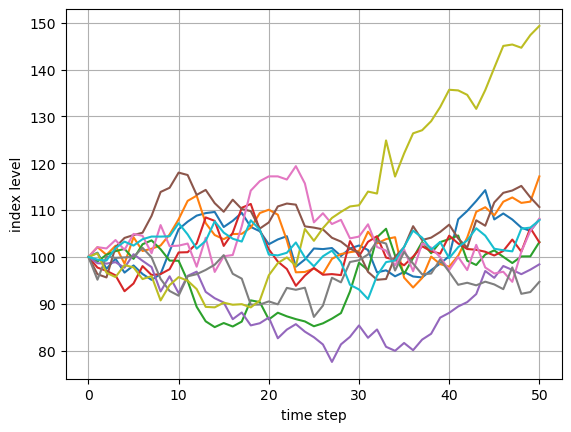

In [2]:
import matplotlib.pyplot as plt
plt.plot(S[:, :10])
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('index level')

Text(0, 0.5, 'frequency')

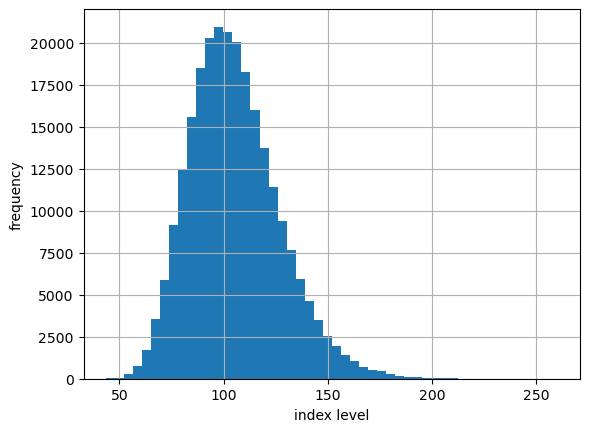

In [4]:
plt.hist(S[-1], bins=50)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')

(0.0, 50000.0)

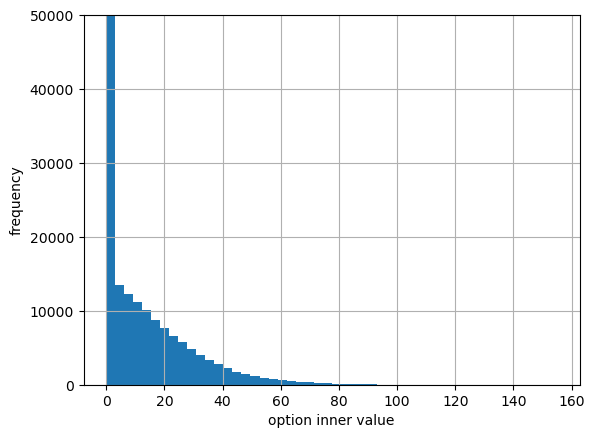

In [6]:
import numpy as np
plt.hist(np.maximum(S[-1] - K, 0), bins=50)
plt.grid(True)
plt.xlabel('option inner value')
plt.ylabel('frequency')
plt.ylim(0,50000)

In [8]:
# number of times the option is worthless
num = sum(S[-1] < K)

# percentage of worthless options
perc= num / 250000

print(f" num: {num}, percentage: {perc}")

 num: 133533, percentage: 0.534132


In [12]:
#numpy is already imported
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf

In [16]:
# no longer works -- sp500 = web.DataReader('^GSPC', data_source = 'yahoo', start = '1/1/2000', end = '4/14/2014')
# sp500.info()

sp500 = yf.download('^GSPC', start='2000-01-01', end='2014-04-14',auto_adjust=True)
print(sp500.info())
# see first rows - print(sp500.head())

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3591 entries, 2000-01-03 to 2014-04-11
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   3591 non-null   float64
 1   (High, ^GSPC)    3591 non-null   float64
 2   (Low, ^GSPC)     3591 non-null   float64
 3   (Open, ^GSPC)    3591 non-null   float64
 4   (Volume, ^GSPC)  3591 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 168.3 KB
None


<Axes: xlabel='Date'>

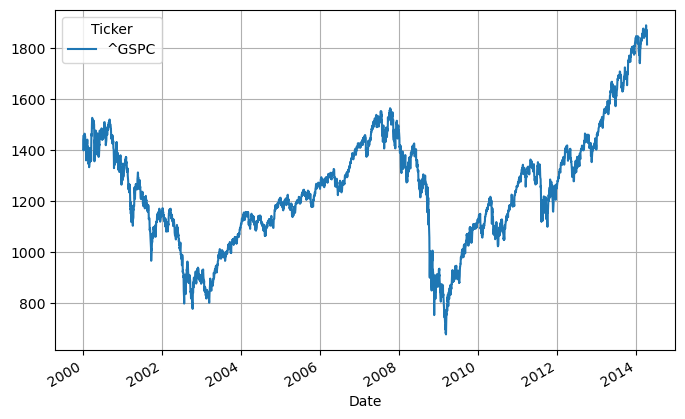

In [17]:
sp500['Close'].plot(grid=True, figsize = (8,5))

In [19]:
# two month and one year trading days
sp500['42d'] = sp500['Close'].rolling(window=42).mean().round(2)
sp500['252d'] = sp500['Close'].rolling(window=252).mean().round(2)

In [20]:
sp500[['Close', '42d', '252d']].tail()

Price,Close,42d,252d
Ticker,^GSPC,,
Date,,,
2014-04-07,1845.040039,1852.01,1727.53
2014-04-08,1851.959961,1853.88,1728.66
2014-04-09,1872.180054,1855.67,1729.79
2014-04-10,1833.079956,1856.46,1730.74
2014-04-11,1815.689941,1856.36,1731.64


<Axes: xlabel='Date'>

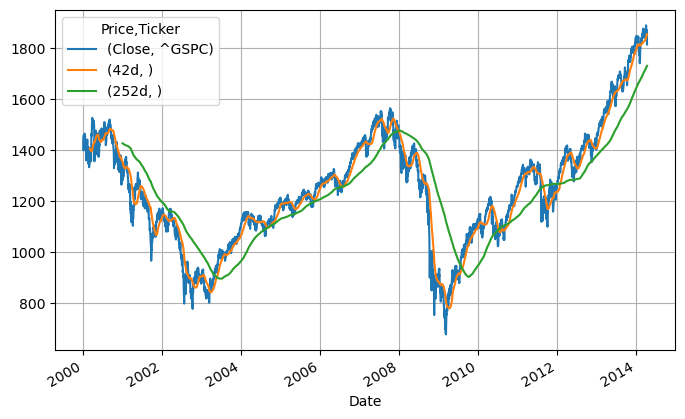

In [22]:
sp500[['Close', '42d', '252d']].plot(grid = True, figsize = (8,5))

In [23]:
sp500['42-252']= sp500['42d'] - sp500['252d']
sp500['42-252'].tail()

Date
2014-04-07    124.48
2014-04-08    125.22
2014-04-09    125.88
2014-04-10    125.72
2014-04-11    124.72
Name: 42-252, dtype: float64

In [25]:
SD = 50
sp500['Regime'] = np.where(sp500['42-252'] > SD, 1, 0)
sp500['Regime'] = np.where(sp500['42-252'] < -SD, -1, sp500['Regime'])
sp500['Regime'].value_counts()

Regime
 1    1488
 0    1232
-1     871
Name: count, dtype: int64

(-1.1, 1.1)

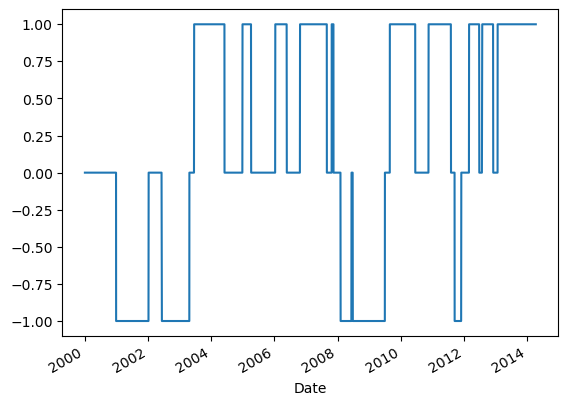

In [26]:
sp500['Regime'].plot(lw=1.5)
plt.ylim([-1.1,1.1])

In [28]:
sp500['Market'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

In [29]:
sp500['Strategy'] = sp500['Regime'].shift(1) * sp500['Market']

<Axes: xlabel='Date'>

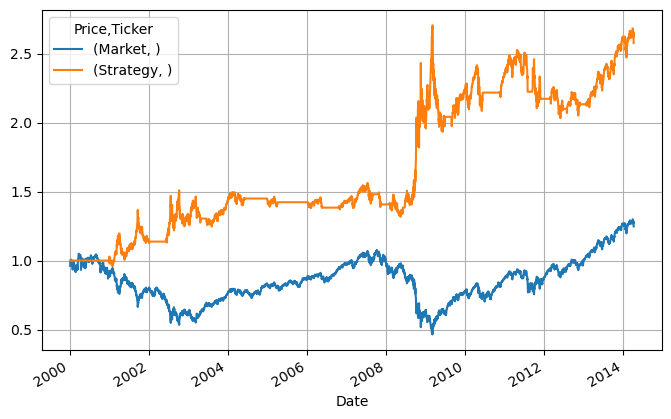

In [30]:
sp500[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid = True, figsize = (8,5))